
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
medical_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/medical-charges.csv')


In [5]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Не знаючи методів ML, можна проаналзувати дані та створити правила за якими можна визначати розмір медичних оплат `charges` для наступних клієнтів.

- Після перевірки коректності даних, можемо проаналізувати статистичний звіт по всьому масиву даних (мін, макс, персентилі...) можливо цей аналіз вже покаже необхідні залежності.

- Проаналізувати залежність розміру `charges` до кожної з інших даних,
наприклад поділити по віковим групам, статі і регіонам, далі додати наявність дитини і індекс маси тіла , знайти цю залежність і вирахувати середнє `charges`, яке можна буде призначати за знайдених правил

- Проаналізувати не стандартні випадки та знайти залежність між ними, наприклад коли `charges` найбільша чи найменша і для цих клієнтів визначити інші правила для визначення остаточного `charges`



**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [8]:
fig_sex = px.histogram(medical_df,
                   x='charges',
                   color='sex',
                   marginal='box',
                   nbins=47,
                   title='Distribution of charges ammount by sex'
)
fig_sex.update_layout(bargap=0.1)
fig_sex.show()

In [9]:
medical_df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

**Спостереження**

За допомгою даної гістограми та маржинального боксплоту в розрізі статі ми бачимо, що найбільше припадає виплат до 15 тисяч і в середньому жінки та чоловіки маюсь однакові платежі, але от саме великі платежі припадають більше на чоловіків.

Припущення, що чоловіки користуються дорожчими медичними послугами або більшим обʼємом послуг.

In [10]:
fig_region = px.histogram(medical_df,
                   x='charges',
                   color='region',
                   marginal='box',
                   nbins=47,
                   title='Distribution of charges ammount by region'
)
fig_region.update_layout(bargap=0.1)
fig_region.show()

In [28]:
medical_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

**Спостереження**

В розрізі регіонів ми також спостерігаємо більш менш однакову суму середнього платежу, але найбільші суми платежів простежуються саме в southeast регіоні.



Спробуємо побудувати гістограму по регіонам і статі одночасно

In [11]:
fig_sex_to_region = px.histogram(medical_df,
                          x='charges',
                          color='sex',
                          facet_col='region',
                          marginal='box',
                          nbins=20,
                          title='Distribution of charges ammount by sex and region'
)
fig_sex_to_region.update_layout(bargap=0.1)
fig_sex_to_region.show()

**Спостереження**

Бачимо, що загальна картинка між регіонами дуде схожа, але як зробили спрстереження в поперед найбільші суми платежів простежуються саме в southeast регіоні.

Це потребує додаткового аналізу для чітких висновків.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

Розглянемо на одному графіку картинку по кожному регіону в кількостях людей та сумі оплат

In [16]:
fig_reg_children_count = px.histogram(medical_df,
                          x='children',
                          y='charges',
                          color='smoker',
                          facet_col='region',
                          histfunc='count',
                          nbins=20,
                          barmode='group',
                          title='Distribution of charges count, sex, and region'
)
fig_reg_children_count.update_layout(bargap=0.1)
fig_reg_children_count.show()

In [15]:
fig_reg_children = px.histogram(medical_df,
                          x='children',
                          y='charges',
                          color='smoker',
                          facet_col='region',
                          histfunc='sum',
                          nbins=20,
                          barmode='group',
                          title='Distribution of charges sum, sex, and region'
)
fig_reg_children.update_layout(bargap=0.1)
fig_reg_children.show()

**Спостереження**
По першому графіку бачимо, що кожен регіон має як курців так і не курців, але не курців більша частина в кожному регіоні, і в сімʼях з 4 і більше дітьми, майже нема курців.

Але якщо подивитись на другий графік з сумою оплат - бачимо, що в цілому це не сильно впливає на суму оплат за вийнятком регіону southeast, де курці роблять більші оплати, ніж не курці.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [17]:
fig_charges_children = px.violin(medical_df,
                x='children',
                y='charges',
                box=True,
                points='all',
                title="Distribution of charges and children")

fig_charges_children.show()

**Спостередення**

Графік показує розподіл медичних оплат до к-ть дітей, для деяких значень к-ті дітей розподіл оплат більш широкий, а для деяких має більше аутлайєрів, ніж для інших.

Припущення, що сімʼї з 5 children не мають аномальних charges і не сильно відрізняються від середніх оплат.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [18]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [19]:
def estimate_charges(age, w, b):
    return w * age + b

In [20]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show();

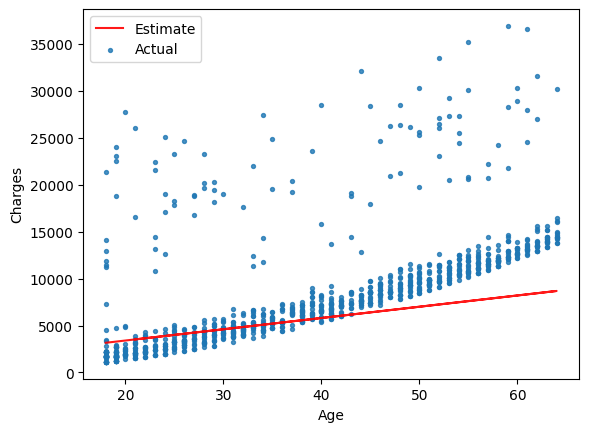

In [21]:
w1, b1 = 120, 1000
try_parameters(non_smoker_df, w1, b1)

Лінійна модель показує загальну тенденцію зростання медичних оплат зі збільшенням віку.
Однак, лінія з цими параметрами дещо недооцінює збори для старших користувачів.

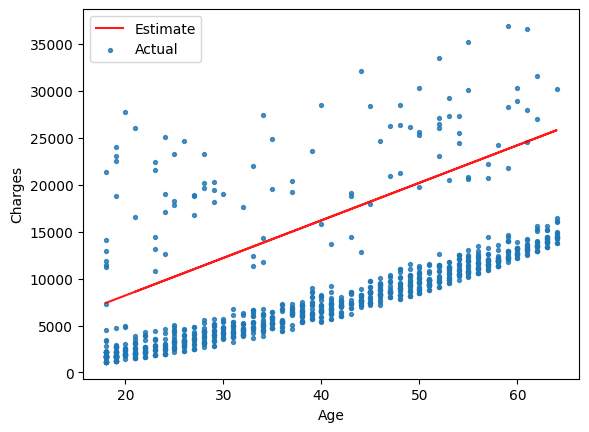

In [22]:
w2, b2 = 400, 200
try_parameters(non_smoker_df, w2, b2)

Ця лінія гарно показує тенденцію, але переоцінює користувачів.

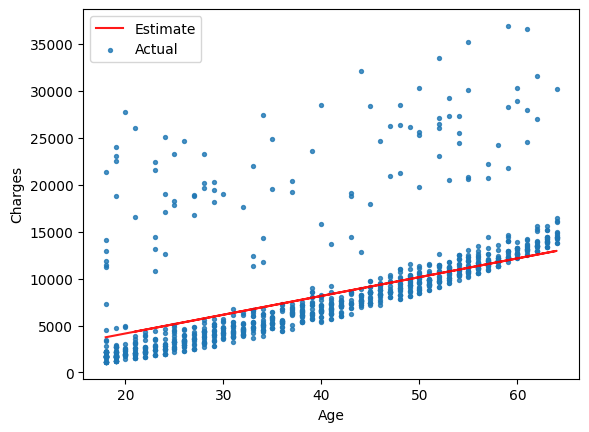

In [23]:
w3, b3 = 200, 150
try_parameters(non_smoker_df, w3, b3)

Ця лінія найближче оцінює тенденцію медичних оплат по віку, але не є ідеальною.

Для точної моделі необхідно проводити додатковий аналіз, та використати методи машинного навчання для оптимізації параметрів.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [24]:
import numpy as np

Використаємо функцію для обрахунку і виведення RMSE значень


In [25]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [54]:
def try_parameters_rmse(df, w, b):
    targets = df['charges']
    predictions = estimate_charges(df['age'], w, b)
    rmse(targets, predictions)
    #коментую вивір для останнього завдання
    #print(f'RMSE ручний підбір w:{w:.2f}, b:{b:.2f} = {rmse(targets, predictions):.2f}')
    return rmse(targets, predictions)


In [55]:
rmse1 = try_parameters_rmse(non_smoker_df, w1, b1)

RMSE ручний підбір w:120.00, b:1000.00 = 5776.58


In [56]:
rmse2 = try_parameters_rmse(non_smoker_df, w2, b2)

RMSE ручний підбір w:400.00, b:200.00 = 9043.20


In [57]:
rmse3 = try_parameters_rmse(non_smoker_df, w3, b3)

RMSE ручний підбір w:200.00, b:150.00 = 4775.03


Найнижче значення втрат вийшло в 3 варіанті = 4775.03
Що значить, що в середньому, кожен елемент у прогнозі відрізняється від фактичної цілі на $4775.

Можна спробувати створити функцію для грубого підбору значень, яка буде підбирати плюс/мінус значення з певного діапазону і обчислювати для них rmse, і визначити найбільш підходящі значення для яких буде найменша помилка.



In [39]:
import matplotlib.pyplot as plt

Найкращі параметри (грубий пошук): w=190, b=1000, RMSE=4787.88


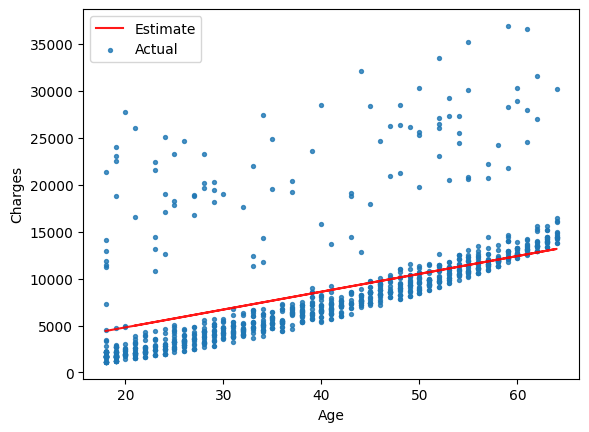

In [53]:
# Функція для грубого підбору значень w та b
def w_b_search(df, w_range, b_range, step_w=10, step_b=100):
    best_rmse = float('inf')
    current_rmse = float('inf')
    best_params = (0, 0)
    for w in np.arange(w_range[0], w_range[1], step_w):
        for b in np.arange(b_range[0], b_range[1], step_b):
            current_rmse = try_parameters_rmse(df, w, b)
            if current_rmse < best_rmse:
                best_rmse = current_rmse
                best_params = (w, b)
    return best_params, best_rmse

# Грубий пошук
w_range = (50, 200)
b_range = (0, 3000)
best_params_rough, best_rmse_rough = w_b_search(non_smoker_df, w_range, b_range)
print(f'Найкращі параметри (грубий пошук): w={best_params_rough[0]}, b={best_params_rough[1]}, RMSE={best_rmse_rough:.2f}')

# Виведемо графік
wf, bf = best_params_rough
try_parameters(non_smoker_df, wf, bf)

Чи використати існуючі методи підбору w i b змінних для зменшення втрат і поліпшення "підгонки" лінії до даних з якими ознайомились в лекції. Наприклад використаємо метод найменших квадратів.

w = (n∑x(i)​y(i) − ∑x(i)​∑y(i)) / (n∑x(i)^2 − (∑x(i))^2)


b = (∑y(i) − w∑x(i)) / n

де:

x(i) - значення змінної віку,

y(i) - значення медичних оплат,

n - кількість спостережень.


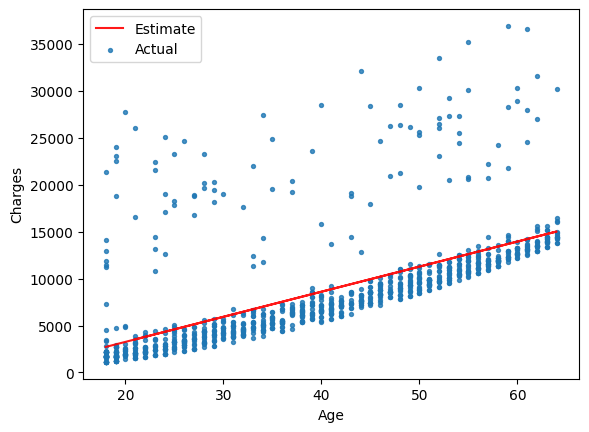

RMSE методом найменших квадратів для w = 267.25, b = -2091.42: 4662.51


In [60]:
# Задамо змінні
x = non_smoker_df['age']
y = non_smoker_df['charges']
n = len(x)

# Обчислення параметрів w та b за методом найменших квадратів
w = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x ** 2) - (np.sum(x) ** 2))
b = (np.sum(y) - w * np.sum(x)) / n

# Візуалізація даних та лінійної регресії
try_parameters(non_smoker_df, w, b)

# Обчислення RMSE для знайдених параметрів
estimated_charges = estimate_charges(x, w, b)
final_rmse = rmse(y, estimated_charges)
print(f'RMSE методом найменших квадратів для w = {w:.2f}, b = {b:.2f}: {final_rmse:.2f}')

**Висновок**

Інтуітивно підібрані параметри
RMSE з ручним підбором w:200.00, b:150.00 = 4775.03

Найкращі параметри (грубий пошук): w=190, b=1000, RMSE=4787.8

RMSE методом найменших квадратів для w=267.25, b=-2091.42: 4662.51

Останній метод визначив найоптимальніший результат

